In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Create matrix of distances between each pair of cities (considering the problem as asymmetric i.e. AB <> BA)
data = pd.DataFrame([[0,75,99,9,35,63,8],[51,0,86,46,88,29,20],[100,5,0,16,28,35,28],
                      [20,45,11,0,59,53,49],[86,63,33,65,0,76,72],[36,53,89,31,21,0,52],
                      [58,31,43,67,52,60,0]], columns=["A","B","C","D","E","F","G"],
                     index=["A","B","C","D","E","F","G"]) # Dataframe for 7-cities
data

,A,B,C,D,E,F,G
A,0,75,99,9,35,63,8
B,51,0,86,46,88,29,20
C,100,5,0,16,28,35,28
D,20,45,11,0,59,53,49
E,86,63,33,65,0,76,72
F,36,53,89,31,21,0,52
G,58,31,43,67,52,60,0


In [2]:
#Create an initial random solution
X0 = ["A","C","G","D","E","B","F"] # Initial solution

#calculate total distance for random intial solution
distance = []
for i in range(len(X0)-1):
    X1 = data.loc[X0[i],X0[i+1]]   #distance between each city and city after that
    X11 = data.loc[X0[-1],X0[0]]   #distance between last and first city
    distance.append(X1)

distance.append(X11)
Length_of_Travel = sum(distance)
print('Total distance travelled by sales man is: {}'.format(Length_of_Travel))

Total distance travelled by sales man is: 381


In [3]:
#Setting parameters for simulated annealing
T0 = 3000    #initial temperature
M = 1000     #number of iterations
N = 50       #number of neighbors to search for
Alpha = 0.85 #temperature cooling rate

#for visualization purpose
Temp = []
Min_Distance = []

for i in range(M):
    for j in range(N):
        #Generate 2 random integers to randomly select 2 cities to swap their positions
        rand1 = np.random.randint(0, len(X0))
        rand2 = np.random.randint(0, len(X0))
        #apply condition for both random numbers to be different
        while rand1 == rand2:
            rand2 = np.random.randint(0, len(X0))
        
        Xtemp = []
        A1 = X0[rand1]
        A2 = X0[rand2]
        
        #Making a new list of new set of cities
        w = 0
        for i in X0:
            if X0[w] == A1:
                Xtemp = np.append(Xtemp, A2)
            elif X0[w] == A2:
                Xtemp = np.append(Xtemp, A1)
            else:
                Xtemp = np.append(Xtemp, X0[w])
            w = w+1
        Xtemp = list(Xtemp)
        
        # The OF of the solution in hand
        distances_X0 = []
        for i in range(len(X0)-1):
            X1_1 = data.loc[X0[i],X0[i+1]]   #distance between each city and city after that
            X11 = data.loc[X0[-1],X0[0]]   #distance between last and first city
            distances_X0.append(X1_1)
        
        distances_X0.append(X11)
        Len_X0 = sum(distances_X0)
        
        # The OF of the potential solution in hand
        distances_Xtemp = []
        for i in range(len(Xtemp)-1):
            X1_2 = data.loc[Xtemp[i],Xtemp[i+1]]   #distance between each city and city after that
            X11 = data.loc[Xtemp[-1],Xtemp[0]]   #distance between last and first city
            distances_Xtemp.append(X1_2)
        
        distances_Xtemp.append(X11)
        Len_Xtemp = sum(distances_Xtemp)
        
        #Generate a random number to evaluate against mathematical formulation of simulated annealing method
        rand_n = np.random.rand()
        form_1 = 1/(np.exp((Len_Xtemp-Len_X0)/T0)) # The formula to accept moves
        
        if Len_Xtemp <= Len_X0:   # If the OF of the potential solution was better (less)
            X0 = Xtemp
        elif rand_n <= form_1: # If the RN was less than the formula
            X0 = Xtemp
        else:    # Don't accept the potential solution and stay where you are
            X0 = X0
        
    Temp = np.append(Temp, T0) # Append temps. for visualization
    Min_Distance = np.append(Min_Distance,Len_Xtemp) # Append costs for visualization
    
    T0 = Alpha*T0 # Decrease the temp.

Final Solution is:  ['E', 'C', 'D', 'A', 'G', 'B', 'F']
Minimized Distance at Final Solution is:  158


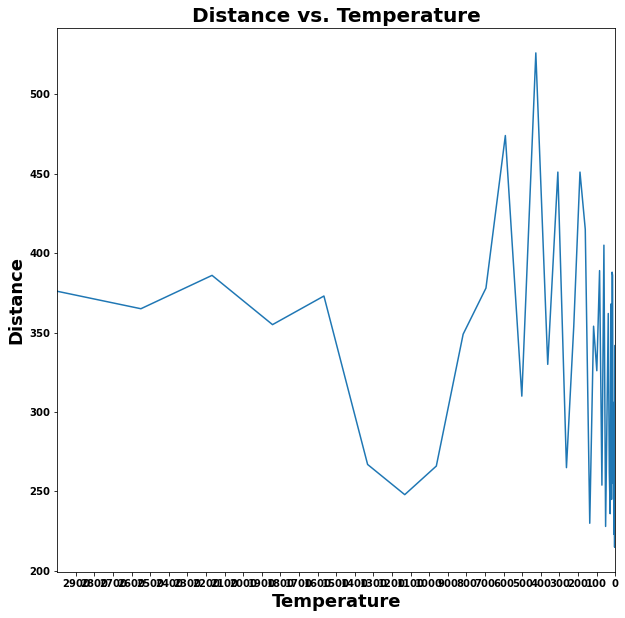

In [5]:
print
print
print("Final Solution is: ", X0)
print("Minimized Distance at Final Solution is: ", Len_X0)

plt.figure(figsize = (10,10))
plt.plot(Temp,Min_Distance)
plt.title("Distance vs. Temperature",fontsize=20,fontweight='bold')
plt.xlabel("Temperature",fontsize=18,fontweight='bold')
plt.ylabel("Distance",fontsize=18,fontweight='bold')
plt.xlim(3000, 0)
plt.xticks(np.arange(min(Temp), max(Temp), 100),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()